<a href="https://colab.research.google.com/github/ajits-github/Binary_Classification_with_ordinal_data/blob/main/Binary_Classification_with_ordinal_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import csv

In [ ]:
path_to_data = '/content/drive/MyDrive/Colab Notebooks/Assignment_Data.csv'
df_original = pd.read_csv(path_to_data)
df_original

,country_id;application_id;product_id;Variable_1;Variable_2;Variable_3;Variable_4;Variable_5;Variable_6;Variable_7;due_date;first_status_day_date;first_status_time_of_day;paid_date;Variable_8;customer_id;arrived_date;Variable_9;Variable_10;Variable_11;Variable_12;Variable_13;Variable_14;Variable_15;Variable_16;Variable_17;Variable_18;Variable_19;Variable_20;Variable_21;Variable_22;Variable_23;Variable_24;Variable_25;Variable_26;Variable_27;Variable_28;Variable_29;Variable_30;Variable_31;Variable_32;Variable_33;Variable_34;Variable_35;Variable_36;Variable_37;Variable_38;Variable_39;Variable_40;Variable_41;Variable_42;Variable_43;Variable_44;Variable_45;Target
0,21;24176;21210001;35;1;1;1;N;72;27;07/07/2015;...
1,21;24185;21210001;30;1;1;1;N;25;26;02/07/2015;...
2,21;24215;21210001;30;1;1;1;N;65;21;02/07/2015;...
3,21;24220;21210001;30;1;1;1;N;65;48;17/07/2015;...
4,21;24255;21210001;30;2;1;1;N;4;28;02/07/2015;0...
...,...
2567,21;98827;21210001;60;1;1;1;N;66;38;22/08/2016;...
2568,21;98833;21210001;30;1;1;1;N;22;44;03/07/2016;...
2569,21;98836;21210001;30;2;1;1;N;65;21;10/07/2016;...
2570,21;98838;21210001;30;2;1;1;N;96;56;02/07/2016;...


In [ ]:
# Open the CSV file
with open(path_to_data, 'r') as file:
    # Create a CSV reader object
    reader = csv.reader(file, delimiter=';')

    # Get the column names from the first row
    column_names = next(reader)

    # Read the remaining rows and create the DataFrame
    data = [row for row in reader]
    df_original = pd.DataFrame(data, columns=column_names)

df_original

,country_id,application_id,product_id,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,due_date,first_status_day_date,first_status_time_of_day,paid_date,Variable_8,customer_id,arrived_date,Variable_9,Variable_10,Variable_11,Variable_12,Variable_13,Variable_14,Variable_15,Variable_16,Variable_17,Variable_18,Variable_19,Variable_20,Variable_21,Variable_22,Variable_23,Variable_24,Variable_25,Variable_26,Variable_27,Variable_28,Variable_29,Variable_30,Variable_31,Variable_32,Variable_33,Variable_34,Variable_35,Variable_36,Variable_37,Variable_38,Variable_39,Variable_40,Variable_41,Variable_42,Variable_43,Variable_44,Variable_45,Target
0,21,24176,21210001,35,1,1,1,N,72,27,07/07/2015,01/06/2015,00:43:22,02/06/2015,100,2970192,01/06/2015 00:43,190,100,100,15,M,RATINGSTUFE M,0,0,0,0,1,NULL,NULL,NULL,1,0,0,0,1,0,0,0,0,0,0,0,0,0,NULL,NULL,NULL,0,0,NULL,NULL,14/06/2013,F,1
1,21,24185,21210001,30,1,1,1,N,25,26,02/07/2015,01/06/2015,07:56:36,02/06/2015,199,2970195,01/06/2015 07:56,199,199,199,15,M,RATINGSTUFE M,4,1,0,0,0,25000,NULL,100,0,0,0,0,4,0,0,0,0,0,0,0,0,0,40147,NULL,100,0,0,NULL,NULL,NULL,M,1
2,21,24215,21210001,30,1,1,1,N,65,21,02/07/2015,01/06/2015,11:02:04,02/06/2015,100,2970204,01/06/2015 11:02,100,100,100,15,G,RATINGSTUFE G,1,2,0,0,0,499,NULL,200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,499,NULL,300,0,0,NULL,NULL,NULL,F,0
3,21,24220,21210001,30,1,1,1,N,65,48,17/07/2015,01/06/2015,11:22:37,17/06/2015,199,2970206,01/06/2015 11:22,199,199,199,15,D,RATINGSTUFE D,0,0,0,0,0,NULL,NULL,NULL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NULL,NULL,NULL,0,0,NULL,NULL,NULL,F,1
4,21,24255,21210001,30,2,1,1,N,4,28,02/07/2015,01/06/2015,15:27:18,02/06/2015,199,2430110,01/06/2015 15:27,600,199,199,15,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,F,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2567,21,98827,21210001,60,1,1,1,N,66,38,22/08/2016,31/05/2016,17:38:50,23/06/2016,300,5374051,31/05/2016 17:38,300,300,300,0,F,RATINGSTUFE F,4,1,1,0,0,24039,3000,500,0,0,0,1,1,0,0,0,0,0,0,0,0,0,66955,3000,500,0,0,NULL,NULL,NULL,M,
2568,21,98833,21210001,30,1,1,1,N,22,44,03/07/2016,31/05/2016,17:59:09,03/06/2016,0,4031947,31/05/2016 17:59,100,100,100,45,M,RATINGSTUFE M,4,4,0,1,0,18000,NULL,1800,1,0,0,1,5,0,0,0,0,0,0,0,1,0,31250,NULL,3950,1,0,NULL,02/04/2013,02/07/2013,F,
2569,21,98836,21210001,30,2,1,1,N,65,21,10/07/2016,31/05/2016,18:12:59,10/06/2016,0,4472725,31/05/2016 18:12,100,100,100,45,M,RATINGSTUFE M,0,0,0,1,0,NULL,NULL,NULL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NULL,NULL,NULL,0,0,NULL,NULL,NULL,M,
2570,21,98838,21210001,30,2,1,1,N,96,56,02/07/2016,31/05/2016,18:19:20,02/06/2016,199,4359857,31/05/2016 18:19,199,199,199,45,H,RATINGSTUFE H,6,1,0,0,0,33816,NULL,199,0,0,0,0,4,0,0,0,0,0,0,0,0,0,136048,NULL,199,0,0,NULL,NULL,NULL,F,


In [ ]:
# Take a copy of original dataframe to do other operations
df = df_original.copy()
df


,country_id,application_id,product_id,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,due_date,first_status_day_date,first_status_time_of_day,paid_date,Variable_8,customer_id,arrived_date,Variable_9,Variable_10,Variable_11,Variable_12,Variable_13,Variable_14,Variable_15,Variable_16,Variable_17,Variable_18,Variable_19,Variable_20,Variable_21,Variable_22,Variable_23,Variable_24,Variable_25,Variable_26,Variable_27,Variable_28,Variable_29,Variable_30,Variable_31,Variable_32,Variable_33,Variable_34,Variable_35,Variable_36,Variable_37,Variable_38,Variable_39,Variable_40,Variable_41,Variable_42,Variable_43,Variable_44,Variable_45,Target
0,21,24176,21210001,35,1,1,1,N,72,27,07/07/2015,01/06/2015,00:43:22,02/06/2015,100,2970192,01/06/2015 00:43,190,100,100,15,M,RATINGSTUFE M,0,0,0,0,1,NULL,NULL,NULL,1,0,0,0,1,0,0,0,0,0,0,0,0,0,NULL,NULL,NULL,0,0,NULL,NULL,14/06/2013,F,1
1,21,24185,21210001,30,1,1,1,N,25,26,02/07/2015,01/06/2015,07:56:36,02/06/2015,199,2970195,01/06/2015 07:56,199,199,199,15,M,RATINGSTUFE M,4,1,0,0,0,25000,NULL,100,0,0,0,0,4,0,0,0,0,0,0,0,0,0,40147,NULL,100,0,0,NULL,NULL,NULL,M,1
2,21,24215,21210001,30,1,1,1,N,65,21,02/07/2015,01/06/2015,11:02:04,02/06/2015,100,2970204,01/06/2015 11:02,100,100,100,15,G,RATINGSTUFE G,1,2,0,0,0,499,NULL,200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,499,NULL,300,0,0,NULL,NULL,NULL,F,0
3,21,24220,21210001,30,1,1,1,N,65,48,17/07/2015,01/06/2015,11:22:37,17/06/2015,199,2970206,01/06/2015 11:22,199,199,199,15,D,RATINGSTUFE D,0,0,0,0,0,NULL,NULL,NULL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NULL,NULL,NULL,0,0,NULL,NULL,NULL,F,1
4,21,24255,21210001,30,2,1,1,N,4,28,02/07/2015,01/06/2015,15:27:18,02/06/2015,199,2430110,01/06/2015 15:27,600,199,199,15,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,F,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2567,21,98827,21210001,60,1,1,1,N,66,38,22/08/2016,31/05/2016,17:38:50,23/06/2016,300,5374051,31/05/2016 17:38,300,300,300,0,F,RATINGSTUFE F,4,1,1,0,0,24039,3000,500,0,0,0,1,1,0,0,0,0,0,0,0,0,0,66955,3000,500,0,0,NULL,NULL,NULL,M,
2568,21,98833,21210001,30,1,1,1,N,22,44,03/07/2016,31/05/2016,17:59:09,03/06/2016,0,4031947,31/05/2016 17:59,100,100,100,45,M,RATINGSTUFE M,4,4,0,1,0,18000,NULL,1800,1,0,0,1,5,0,0,0,0,0,0,0,1,0,31250,NULL,3950,1,0,NULL,02/04/2013,02/07/2013,F,
2569,21,98836,21210001,30,2,1,1,N,65,21,10/07/2016,31/05/2016,18:12:59,10/06/2016,0,4472725,31/05/2016 18:12,100,100,100,45,M,RATINGSTUFE M,0,0,0,1,0,NULL,NULL,NULL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NULL,NULL,NULL,0,0,NULL,NULL,NULL,M,
2570,21,98838,21210001,30,2,1,1,N,96,56,02/07/2016,31/05/2016,18:19:20,02/06/2016,199,4359857,31/05/2016 18:19,199,199,199,45,H,RATINGSTUFE H,6,1,0,0,0,33816,NULL,199,0,0,0,0,4,0,0,0,0,0,0,0,0,0,136048,NULL,199,0,0,NULL,NULL,NULL,F,


# Data Pre-processing And Extraction
Based on the provided data, here are some potential cleaning steps that can be considered:

In [ ]:
# Check for missing values
df.isnull().sum()


country_id                  0
application_id              0
product_id                  0
Variable_1                  0
Variable_2                  0
Variable_3                  0
Variable_4                  0
Variable_5                  0
Variable_6                  0
Variable_7                  0
due_date                    0
first_status_day_date       0
first_status_time_of_day    0
paid_date                   0
Variable_8                  0
customer_id                 0
arrived_date                0
Variable_9                  0
Variable_10                 0
Variable_11                 0
Variable_12                 0
Variable_13                 0
Variable_14                 0
Variable_15                 0
Variable_16                 0
Variable_17                 0
Variable_18                 0
Variable_19                 0
Variable_20                 0
Variable_21                 0
Variable_22                 0
Variable_23                 0
Variable_24                 0
Variable_2

In [ ]:
# Check for duplicate entries
duplicates = df.duplicated().sum()
print("Number of duplicate entries: ",duplicates)


Number of duplicate entries:  0


In [ ]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)


In [ ]:
# Replace 'NULL' values with actual null values (NaN)
df.replace('NULL', pd.NA, inplace=True)

# Find null values in each column
null_counts = df.isnull().sum()

# Display the null value counts
print(null_counts)

country_id                     0
application_id                 0
product_id                     0
Variable_1                     0
Variable_2                     0
Variable_3                     0
Variable_4                     0
Variable_5                     0
Variable_6                    35
Variable_7                     1
due_date                       0
first_status_day_date          0
first_status_time_of_day       0
paid_date                      0
Variable_8                     0
customer_id                    0
arrived_date                   0
Variable_9                     0
Variable_10                    0
Variable_11                    0
Variable_12                    0
Variable_13                   65
Variable_14                   65
Variable_15                  184
Variable_16                  184
Variable_17                  184
Variable_18                  184
Variable_19                  184
Variable_20                 1100
Variable_21                 1990
Variable_2

* As it can be seen, there are few columns that contain 80-90 percent values as Null and these are not going to contribute much in the predictive modeling and analysis. For this reason, we will drop these columns from the dataframe.

* For the rest of the Null values in the dataframe, we will try to impute the missing ones using different techniques for different kind of columns later. The handling of the Null values will be the same for both train and test data so that a consistency could be maintained.

In [ ]:
# Set the threshold for null values percentage
null_threshold = 0.9  # 90% or higher null values

# Calculate the percentage of null values in each column
null_percentages = df.isnull().mean()

# Get the columns with null values exceeding the threshold
columns_to_drop = null_percentages[null_percentages >= null_threshold].index


In [ ]:
# null_percentages

In [ ]:
columns_to_drop = columns_to_drop.tolist()
columns_to_drop

['Variable_42', 'Variable_43', 'Variable_44']

In [ ]:
print("Shape of dataframe BEFORE dropping columns: ",df.shape)
df.drop(columns_to_drop, axis=1, inplace=True)
print("Shape of dataframe AFTER dropping columns: ",df.shape)


Shape of dataframe BEFORE dropping columns:  (2572, 55)
Shape of dataframe AFTER dropping columns:  (2572, 52)


In [ ]:
# Column counts
column_lengths = df.nunique()

# Print the length of unique values for each column
for column, length in column_lengths.items():
    print(f"Length of unique values in column '{column}': {length}")

print(f"\nTotal number of records: {df.shape[0]}")


Length of unique values in column 'country_id': 1
Length of unique values in column 'application_id': 2572
Length of unique values in column 'product_id': 1
Length of unique values in column 'Variable_1': 35
Length of unique values in column 'Variable_2': 9
Length of unique values in column 'Variable_3': 1
Length of unique values in column 'Variable_4': 2
Length of unique values in column 'Variable_5': 1
Length of unique values in column 'Variable_6': 96
Length of unique values in column 'Variable_7': 59
Length of unique values in column 'due_date': 345
Length of unique values in column 'first_status_day_date': 351
Length of unique values in column 'first_status_time_of_day': 2523
Length of unique values in column 'paid_date': 257
Length of unique values in column 'Variable_8': 5
Length of unique values in column 'customer_id': 2572
Length of unique values in column 'arrived_date': 2568
Length of unique values in column 'Variable_9': 39
Length of unique values in column 'Variable_10': 

* As it can be observed from the above results that there certain id columns which is unique for each record and other columns like country_id which is having just one unique value.

* Another thing to notice here is that there is a categorical column (Variable_5) which has only 1 value (and no Null values) and hence this also is not going to contribute towards predictive modeling. Though there are some numeric columns too (for e.g. Variable_3, Variable_30, Variable_31 etc.) which is having only one or two value but we can't drop it as these are numeric and can have any other values in the inference data.

* Based on this, we will drop the following columns:
  * country_id
  * application_id
  * product_id
  * customer_id
  * Variable_5

In [ ]:
# Taking a copy with application id for test data
# test_df_appid = df.copy()
# columns_to_include = ['application_id', 'Target']
# Select the desired columns
selected_columns = ['application_id', 'Target', 'Variable_13', 'Variable_14']
# Create a new dataframe with the selected columns
new_df = df[selected_columns].copy()
test_df_appid = new_df[new_df['Target']=='']

null_Cols = ['Variable_13', 'Variable_14']
for col in null_Cols:
    test_df_appid = test_df_appid.dropna(subset=[col])

test_df_appid.head()
# df.drop(columns_to_drop, axis=1, inplace=True)

,application_id,Target,Variable_13,Variable_14
2057,85460,,G,RATINGSTUFE G
2058,85462,,H,RATINGSTUFE H
2059,85473,,E,RATINGSTUFE E
2060,85489,,G,RATINGSTUFE G
2061,85500,,M,RATINGSTUFE M


In [ ]:
test_df_appid.shape


(504, 4)

In [ ]:
test_df_appid_new = test_df_appid.drop(['Variable_13', 'Variable_14', 'Target'], axis=1)
test_df_appid_new.shape

(504, 1)

In [ ]:
print("Shape of dataframe BEFORE dropping columns: ",df.shape)
columns_to_drop = ['country_id', 'application_id', 'product_id', 'customer_id', 'Variable_5']
df.drop(columns_to_drop, axis=1, inplace=True)
print("Shape of dataframe AFTER dropping columns: ",df.shape)


Shape of dataframe BEFORE dropping columns:  (2572, 52)
Shape of dataframe AFTER dropping columns:  (2572, 47)


In [ ]:
# Checking the number of unique values in the Target
df['Target'].unique(), df['Target'].nunique()

(array(['1', '0', ''], dtype=object), 3)

In [ ]:
# Summary statistics of numerical columns
print("Summary statistics:")
print(df.describe())


Summary statistics:
       Variable_1 Variable_2 Variable_3 Variable_4 Variable_6 Variable_7  \
count        2572       2572       2572       2572       2537       2571   
unique         35          9          1          2         96         59   
top            30          1          1          1         22         24   
freq         2067       2037       2572       2570         56        135   

          due_date first_status_day_date first_status_time_of_day   paid_date  \
count         2572                  2572                     2572        2572   
unique         345                   351                     2523         257   
top     18/06/2016            19/04/2016                 13:31:13  24/03/2016   
freq            31                    27                        3          38   

       Variable_8      arrived_date Variable_9 Variable_10 Variable_11  \
count        2572              2572       2572        2572        2572   
unique          5              2568         3



---



In [ ]:
df.columns

Index(['Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_6',
       'Variable_7', 'due_date', 'first_status_day_date',
       'first_status_time_of_day', 'paid_date', 'Variable_8', 'arrived_date',
       'Variable_9', 'Variable_10', 'Variable_11', 'Variable_12',
       'Variable_13', 'Variable_14', 'Variable_15', 'Variable_16',
       'Variable_17', 'Variable_18', 'Variable_19', 'Variable_20',
       'Variable_21', 'Variable_22', 'Variable_23', 'Variable_24',
       'Variable_25', 'Variable_26', 'Variable_27', 'Variable_28',
       'Variable_29', 'Variable_30', 'Variable_31', 'Variable_32',
       'Variable_33', 'Variable_34', 'Variable_35', 'Variable_36',
       'Variable_37', 'Variable_38', 'Variable_39', 'Variable_40',
       'Variable_41', 'Variable_45', 'Target'],
      dtype='object')

The below codes convert the dataframe columns to appropriate data types and add new columns based on dates and later drop the date columns. Also, the columns are grouped into three types- **Numerical, Categorical and Ordinal**.

In [ ]:
from datetime import timedelta

# Convert numeric columns to appropriate data types
date_columns = ['due_date', 'paid_date', 'first_status_day_date',]
date_columns1 = ['first_status_time_of_day']
arrived_date_column = ['arrived_date']
categorical_columns = ['Variable_6', 'Variable_45']
ordinal_columns = ['Variable_13', 'Variable_14']


In [ ]:
# Convert date columns to datetime
df[date_columns] = df[date_columns].apply(pd.to_datetime, format='%d/%m/%Y')
df[arrived_date_column] = df[arrived_date_column].apply(pd.to_datetime, format='%d/%m/%Y %H:%M')

# Convert time column to timedelta
df['first_status_time_of_day'] = pd.to_timedelta(df['first_status_time_of_day'])

# Combine date and time columns for complete datetime
df['first_status_datetime'] = df['first_status_day_date'] + df['first_status_time_of_day']

# Drop the original date and time columns of first status
df.drop(['first_status_day_date', 'first_status_time_of_day'], axis=1, inplace=True)


In [ ]:
# Extract features from date columns
df['is_weekend'] = df['due_date'].dt.dayofweek.isin([5, 6]).astype(int)
df['is_holiday'] = df['due_date'].isin(['2023-01-01', '2023-12-25']).astype(int)
df['time_since_paid'] = (df['due_date'] - df['paid_date']).dt.days
df['day_of_year'] = df['due_date'].dt.dayofyear
df['month'] = df['due_date'].dt.month
df['day'] = df['due_date'].dt.day
df['season'] = pd.cut(df['month'], bins=[0, 3, 6, 9, 12], labels=['Winter', 'Spring', 'Summer', 'Fall'])

# Calculate time-based features
df['time_since_arrived'] = (df['due_date'] - df['arrived_date']).dt.days
df['time_since_status'] = (df['due_date'] - df['first_status_datetime']).dt.days
df['quarter'] = df['due_date'].dt.quarter
df['week_of_year'] = df['due_date'].dt.isocalendar().week

# Calculate periodicity features
df['day_of_month'] = df['due_date'].dt.day
df['day_of_week'] = df['due_date'].dt.dayofweek
df['is_month_start'] = df['due_date'].dt.is_month_start.astype(int)
df['is_month_end'] = df['due_date'].dt.is_month_end.astype(int)
df['is_quarter_start'] = df['due_date'].dt.is_quarter_start.astype(int)
df['is_quarter_end'] = df['due_date'].dt.is_quarter_end.astype(int)
df['is_year_start'] = df['due_date'].dt.is_year_start.astype(int)
df['is_year_end'] = df['due_date'].dt.is_year_end.astype(int)


In [ ]:
categorical = ['is_weekend, is_holiday, day_of_year, season, quarter, week_of_year, day_of_month, month, day, day_of_week, is_month_start, is_month_end, is_quarter_start, is_quarter_end, is_year_start, is_year_end']
# numeric = ['time_since_paid', 'time_since_arrived', 'time_since_status']

In [ ]:
categorical = categorical[0].split(",")
categorical = [i.strip() for i in categorical]
categorical_columns = categorical_columns + categorical
categorical_columns


['Variable_6',
 'Variable_45',
 'is_weekend',
 'is_holiday',
 'day_of_year',
 'season',
 'quarter',
 'week_of_year',
 'day_of_month',
 'month',
 'day',
 'day_of_week',
 'is_month_start',
 'is_month_end',
 'is_quarter_start',
 'is_quarter_end',
 'is_year_start',
 'is_year_end']

In [ ]:
numeric_columns = df.columns.drop(['Target', 'first_status_datetime'] + date_columns[:2] + arrived_date_column + categorical_columns + ordinal_columns)

In [ ]:
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)
df.shape

(2572, 65)

In [ ]:
df_filtered_dates = df.drop(['due_date', 'paid_date', 'arrived_date', 'first_status_datetime'], axis=1)
df_filtered_dates.shape

(2572, 61)

In [ ]:
# Remove the column from the DataFrame and store it in a separate variable
column = df_filtered_dates.pop('Target')

# Insert the column at the end of the DataFrame
df_filtered_dates.insert(len(df_filtered_dates.columns), 'Target', column)

# Divide the data into train and test sets
train_df = df_filtered_dates[df_filtered_dates['Target']!='']
test_df = df_filtered_dates[df_filtered_dates['Target']=='']

In [ ]:
# Check the dataframe shapes at this point
print("Original dataframe shape:", df_filtered_dates.shape)
print("Train dataframe shape:", train_df.shape)
print("Test dataframe shape:", test_df.shape)


Original dataframe shape: (2572, 61)
Train dataframe shape: (2057, 61)
Test dataframe shape: (515, 61)


In [ ]:
train_df.columns

Index(['Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_6',
       'Variable_7', 'Variable_8', 'Variable_9', 'Variable_10', 'Variable_11',
       'Variable_12', 'Variable_13', 'Variable_14', 'Variable_15',
       'Variable_16', 'Variable_17', 'Variable_18', 'Variable_19',
       'Variable_20', 'Variable_21', 'Variable_22', 'Variable_23',
       'Variable_24', 'Variable_25', 'Variable_26', 'Variable_27',
       'Variable_28', 'Variable_29', 'Variable_30', 'Variable_31',
       'Variable_32', 'Variable_33', 'Variable_34', 'Variable_35',
       'Variable_36', 'Variable_37', 'Variable_38', 'Variable_39',
       'Variable_40', 'Variable_41', 'Variable_45', 'is_weekend', 'is_holiday',
       'time_since_paid', 'day_of_year', 'month', 'day', 'season',
       'time_since_arrived', 'time_since_status', 'quarter', 'week_of_year',
       'day_of_month', 'day_of_week', 'is_month_start', 'is_month_end',
       'is_quarter_start', 'is_quarter_end', 'is_year_start', 'is_year_end',
  

In [ ]:
# Checking the number of unique values in the Target in Train dataframe
# train_df['Target'].unique(), train_df['Target'].nunique()
print("Unique values in Train dataframe: ", train_df['Target'].unique())


Unique values in Train dataframe:  ['1' '0']


In [ ]:
# Checking the number of unique values in the Target in Test dataframe
# test_df['Target'].unique(), test_df['Target'].nunique()
print("Unique values in Test dataframe: ", test_df['Target'].unique())


Unique values in Test dataframe:  ['']


In [ ]:
def handle_missing_numeric_values(temp_df):
  for col in numeric_columns:
    temp_df[col] = temp_df[col].fillna(temp_df[col].mean())  # Replace with mean
    # or
    # temp_df[col] = temp_df[col].fillna(temp_df[col].median())  # Replace with median

  return temp_df


In [ ]:
def handle_missing_categorical_values(temp_df):
  for col in categorical_columns:
    temp_df[col] = temp_df[col].fillna(temp_df[col].mode()[0])  # Replace with mode

  return temp_df

To handle the ordinal values, we remove the rows with Null values as these are very less in number in comparison to the dataset size.

In [ ]:
def handle_missing_ordinal_values(temp_df):
  for col in ordinal_columns:
    temp_df = temp_df.dropna(subset=[col])  # Remove rows with missing values

  return temp_df

In [ ]:
test_df.shape

(504, 61)

In [ ]:
print("Number of Null values in TRAIN dataframe BEFORE handling them: ", train_df.isnull().sum().sum())
print("Number of Null values in TEST dataframe BEFORE handling them: ", test_df.isnull().sum().sum())
print("------------------------------------------------------------------------------")
print("train_df shape", train_df.shape)
print("test_df shape", test_df.shape)

Number of Null values in TEST dataframe BEFORE handling them:  0
------------------------------------------------------------------------------
train_df shape (2003, 61)
test_df shape (504, 61)


In [ ]:
test_df_appid.head()

,application_id,Target,Variable_13,Variable_14
2057,85460,,G,RATINGSTUFE G
2058,85462,,H,RATINGSTUFE H
2059,85473,,E,RATINGSTUFE E
2060,85489,,G,RATINGSTUFE G
2061,85500,,M,RATINGSTUFE M


In [ ]:
df[df['Variable_14'].isnull()]
#  ['application_id']

,Variable_1,Variable_2,Variable_3,Variable_4,Variable_6,Variable_7,due_date,paid_date,Variable_8,arrived_date,Variable_9,Variable_10,Variable_11,Variable_12,Variable_13,Variable_14,Variable_15,Variable_16,Variable_17,Variable_18,Variable_19,Variable_20,Variable_21,Variable_22,Variable_23,Variable_24,Variable_25,Variable_26,Variable_27,Variable_28,Variable_29,Variable_30,Variable_31,Variable_32,Variable_33,Variable_34,Variable_35,Variable_36,Variable_37,Variable_38,Variable_39,Variable_40,Variable_41,Variable_45,Target,first_status_datetime,is_weekend,is_holiday,time_since_paid,day_of_year,month,day,season,time_since_arrived,time_since_status,quarter,week_of_year,day_of_month,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
4,30,2,1,1,4,28.0,2015-07-02,2015-06-02,199,2015-06-01 15:27:00,600,199,199,15.0,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,1,2015-06-01 15:27:18,0,0,30,183,7,2,Summer,30,30,3,27,2,3,0,0,0,0,0,0
22,30,1,1,1,29,40.0,2015-07-05,2015-06-05,199,2015-06-04 11:28:00,199,199,199,15.0,<NA>,<NA>,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,M,0,2015-06-04 11:28:44,1,0,30,186,7,5,Summer,30,30,3,27,5,6,0,0,0,0,0,0
58,45,1,1,1,46,29.0,2015-08-01,2015-06-17,199,2015-06-11 11:36:00,300,200,200,15.0,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,0,2015-06-11 11:36:45,1,0,45,213,8,1,Summer,50,50,3,31,1,5,1,0,0,0,0,0
126,45,2,1,1,73,18.0,2015-08-08,2015-06-24,100,2015-06-24 13:54:00,190,190,190,0.0,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,1,2015-06-24 13:54:19,1,0,45,220,8,8,Summer,44,44,3,32,8,5,0,0,0,0,0,0
148,45,1,1,1,60,19.0,2015-08-16,2015-07-02,199,2015-07-01 13:29:00,190,190,190,15.0,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,0,2015-07-01 13:29:45,1,0,45,228,8,16,Summer,45,45,3,33,16,6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,30,1,1,1,68,24.0,2016-06-24,2016-05-25,0,2016-05-11 13:51:00,500,100,100,45.0,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,,2016-05-11 13:51:52,0,0,30,176,6,24,Spring,43,43,2,25,24,4,0,0,0,0,0,0
2325,30,1,1,1,58,24.0,2016-06-17,2016-05-18,199,2016-05-12 15:05:00,500,199,199,45.0,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,,2016-05-12 15:05:31,0,0,30,169,6,17,Spring,35,35,2,24,17,4,0,0,0,0,0,0
2357,30,1,1,1,57,26.0,2016-06-16,2016-05-17,199,2016-05-15 15:43:00,199,199,199,45.0,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,,2016-05-15 15:43:02,0,0,30,168,6,16,Spring,31,31,2,24,16,3,0,0,0,0,0,0
2428,30,1,1,1,1,20.0,2016-06-22,2016-05-23,199,2016-05-19 23:19:00,100,100,100,45.0,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,,2016-05-19 23:19:39,0,0,30,174,6,22,Spring,33,33,2,25,22,2,0,0,0,0,0,0


In [ ]:
imputed_dfs = []
for temp_df in [train_df, test_df]:
  temp_df = handle_missing_numeric_values(temp_df)
  temp_df = handle_missing_categorical_values(temp_df)
  temp_df = handle_missing_ordinal_values(temp_df)

  imputed_dfs.append(temp_df)

train_df, test_df = imputed_dfs

In [ ]:
print("Number of Null values TRAIN dataframe AFTER handling them: ", train_df.isnull().sum().sum())
print("Number of Null values TEST dataframe AFTER handling them: ", test_df.isnull().sum().sum())
print("------------------------------------------------------------------------------")
print("train_df shape", train_df.shape)
print("test_df shape", test_df.shape)

Number of Null values TRAIN dataframe AFTER handling them:  0
Number of Null values TEST dataframe AFTER handling them:  0
------------------------------------------------------------------------------
train_df shape (2003, 61)
test_df shape (504, 61)


In [ ]:
train_df.head()

,Variable_1,Variable_2,Variable_3,Variable_4,Variable_6,Variable_7,Variable_8,Variable_9,Variable_10,Variable_11,Variable_12,Variable_13,Variable_14,Variable_15,Variable_16,Variable_17,Variable_18,Variable_19,Variable_20,Variable_21,Variable_22,Variable_23,Variable_24,Variable_25,Variable_26,Variable_27,Variable_28,Variable_29,Variable_30,Variable_31,Variable_32,Variable_33,Variable_34,Variable_35,Variable_36,Variable_37,Variable_38,Variable_39,Variable_40,Variable_41,Variable_45,is_weekend,is_holiday,time_since_paid,day_of_year,month,day,season,time_since_arrived,time_since_status,quarter,week_of_year,day_of_month,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,Target
0,35,1,1,1,72,27.0,100,190,100,100,15.0,M,RATINGSTUFE M,0.0,0.0,0.0,0.0,1.0,14753.156406,4262.150424,2381.25897,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32437.334443,5309.817797,3656.792512,0.0,0.0,F,0,0,35,188,7,7,Summer,35,35,3,28,7,1,0,0,0,0,0,0,1
1,30,1,1,1,25,26.0,199,199,199,199,15.0,M,RATINGSTUFE M,4.0,1.0,0.0,0.0,0.0,25000.000000,4262.150424,100.00000,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40147.000000,5309.817797,100.000000,0.0,0.0,M,0,0,30,183,7,2,Summer,30,30,3,27,2,3,0,0,0,0,0,0,1
2,30,1,1,1,65,21.0,100,100,100,100,15.0,G,RATINGSTUFE G,1.0,2.0,0.0,0.0,0.0,499.000000,4262.150424,200.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,499.000000,5309.817797,300.000000,0.0,0.0,F,0,0,30,183,7,2,Summer,30,30,3,27,2,3,0,0,0,0,0,0,0
3,30,1,1,1,65,48.0,199,199,199,199,15.0,D,RATINGSTUFE D,0.0,0.0,0.0,0.0,0.0,14753.156406,4262.150424,2381.25897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32437.334443,5309.817797,3656.792512,0.0,0.0,F,0,0,30,198,7,17,Summer,45,45,3,29,17,4,0,0,0,0,0,0,1
5,40,2,1,1,65,47.0,199,199,199,199,0.0,K,RATINGSTUFE K,8.0,0.0,1.0,0.0,1.0,745.000000,1500.000000,2381.25897,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2970.000000,1500.000000,3656.792512,0.0,0.0,M,1,0,40,193,7,12,Summer,40,40,3,28,12,6,0,0,0,0,0,0,1


# Predictive Modeling

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Split the data into features (X) and target variable (y) for train_df
X = train_df.drop('Target', axis=1)
y = train_df['Target']

# Split the data into features (X) and target variable (y) for test_df
X_inference = test_df.drop('Target', axis=1)
y_inference = test_df['Target']

# # Apply LabelEncoder to categorical columns
le = LabelEncoder()
for col in categorical_columns:
  if col in X.columns:
    X[col] = le.fit_transform(X[col])
    X_inference[col] = le.fit_transform(X_inference[col])

In [ ]:
test_df.shape

(504, 61)

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Perform ordinal encoding on ordinal columns
ordinal_encoder = OrdinalEncoder()
X_train[ordinal_columns] = ordinal_encoder.fit_transform(X_train[ordinal_columns])
X_test[ordinal_columns] = ordinal_encoder.transform(X_test[ordinal_columns])
X_inference[ordinal_columns] = ordinal_encoder.transform(X_inference[ordinal_columns])

# Take copies for feature selection later on
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

# Scale the numerical features
scaler = StandardScaler()
for col in numeric_columns:
  if col in X_train.columns:
    X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
    X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])


In [ ]:
# Create a list of classifiers
classifiers = [
    {'name': 'Logistic Regression', 'model': LogisticRegression()},
    {'name': 'Decision Tree', 'model': DecisionTreeClassifier()},
    {'name': 'Random Forest', 'model': RandomForestClassifier()},
    {'name': 'K-Nearest Neighbors', 'model': KNeighborsClassifier()},
    {'name': 'Support Vector Machine', 'model': SVC(kernel='linear')},
    {'name': 'Support Vector Machine with Kernel', 'model': SVC(kernel='rbf')},
    {'name': 'Gaussian Naive Bayes', 'model': GaussianNB()},
    {'name': 'Linear Discriminant Analysis', 'model': LinearDiscriminantAnalysis()},
    {'name': 'Gradient Boosting', 'model': GradientBoostingClassifier()},
    {'name': 'Multi-Layer Perceptron', 'model': MLPClassifier()}
]

In [ ]:
def train_and_eval(X_train, y_train, X_test, y_test):
  results = []
  results_new = {}

  # Iterate over the classifiers
  for i, classifier in enumerate(classifiers):
      name = classifier['name']
      model = classifier['model']

      # Fit the classifier to the training data
      model.fit(X_train, y_train)

      # Make predictions on the test data
      y_pred = model.predict(X_test)

      # Calculate accuracy
      accuracy = accuracy_score(y_test, y_pred)

      # Calculate precision, recall, and F1-score
      precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, pos_label='1')

      # Compute confusion matrix
      cm = confusion_matrix(y_test, y_pred)

      # Store the results
      result = {
          'Classifier': name,
          'Accuracy': accuracy,
          'Precision': precision,
          'Recall': recall,
          'F1-score': f1_score,
          'Confusion Matrix': cm
      }
      results.append(result)
      results_new.update({name: result})


  return results, results_new


In [ ]:
def plot_results(results_new):
  # Define the grid layout
  grid_rows = 2
  grid_cols = (len(classifiers) + 1) // 2

  # Create subplots for each classifier
  fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(25, 15))
  fig.tight_layout(pad=4.0)

  # Iterate over the classifiers
  for i, classifier in enumerate(classifiers):
      name = classifier['name']
      model = classifier['model']

      # Plot the confusion matrix
      ax = axes[i // grid_cols, i % grid_cols]
      sns.heatmap(results_new[name]['Confusion Matrix'], annot=True, cmap='Blues', ax=ax)
      ax.set_xlabel('Predicted')
      ax.set_ylabel('True')
      ax.set_title(f"Confusion Matrix - {name}")

      # Convert metrics to strings
      accuracy_str = f"Accuracy: {results_new[name]['Accuracy']:.4f}"
      precision_str = f"Precision: {results_new[name]['Precision'][0]:.4f} {results_new[name]['Precision'][1]:.4f}"
      recall_str = f"Recall: {results_new[name]['Recall'][0]:.4f} Recall: {results_new[name]['Recall'][1]:.4f}"
      f1_str = f"F1-score: {results_new[name]['F1-score'][0]:.4f} {results_new[name]['F1-score'][1]:.4f}"

      # Print the evaluation metrics below the plot
      metrics_text = f"{accuracy_str}\n{precision_str}\n{recall_str}\n{f1_str}"
      ax.text(0.5, -0.05, metrics_text, transform=ax.transAxes, ha='center')

  # Hide the empty subplots
  if len(classifiers) < grid_rows * grid_cols:
      for j in range(len(classifiers), grid_rows * grid_cols):
          fig.delaxes(axes[j // grid_cols, j % grid_cols])

  plt.show()

In [ ]:
def plot_accuracy(results):
  # Prepare the data
  classifiers = [result['Classifier'] for result in results]
  accuracies = [result['Accuracy'] for result in results]

  # Create a bar plot
  plt.figure(figsize=(12, 8))
  plt.bar(classifiers, accuracies)

  # Add values on top of the bars
  for i, accuracy in enumerate(accuracies):
      plt.text(i, accuracy + 0.01, f"{accuracy:.2f}", ha='center')

  # Set plot labels and title
  plt.xlabel('Classifier')
  plt.ylabel('Accuracy')
  plt.title('Accuracy for Each Classifier')

  # Rotate x-axis labels for better readability
  plt.xticks(rotation=45, ha='right')

  # Display the plot
  plt.tight_layout()
  plt.show()


In [ ]:
def best_classifier():
  # Find the best classifier based on accuracy
  best_classifier = max(results, key=lambda x: x['Accuracy'])
  best_classifier_name = best_classifier['Classifier']
  best_classifier_accuracy = best_classifier['Accuracy']

  # Print the best classifier
  print("Best Classifier:")
  print("Classifier:", best_classifier_name)
  print("Accuracy:", best_classifier_accuracy)

  return best_classifier_name




---



### Before Feature Selection

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to '1') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to '1') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single posi

[{'Classifier': 'Logistic Regression', 'Accuracy': 0.7206982543640897, 'Precision': array([0.54761905, 0.74094708]), 'Recall': array([0.19827586, 0.93333333]), 'F1-score': array([0.29113924, 0.82608696]), 'Confusion Matrix': array([[ 23,  93],
       [ 19, 266]])}, {'Classifier': 'Decision Tree', 'Accuracy': 0.6134663341645885, 'Precision': array([0.35114504, 0.74074074]), 'Recall': array([0.39655172, 0.70175439]), 'F1-score': array([0.37246964, 0.72072072]), 'Confusion Matrix': array([[ 46,  70],
       [ 85, 200]])}, {'Classifier': 'Random Forest', 'Accuracy': 0.7107231920199502, 'Precision': array([0.5       , 0.74212034]), 'Recall': array([0.22413793, 0.90877193]), 'F1-score': array([0.30952381, 0.8170347 ]), 'Confusion Matrix': array([[ 26,  90],
       [ 26, 259]])}, {'Classifier': 'K-Nearest Neighbors', 'Accuracy': 0.6334164588528678, 'Precision': array([0.29333333, 0.71165644]), 'Recall': array([0.18965517, 0.81403509]), 'F1-score': array([0.23036649, 0.7594108 ]), 'Confusion M

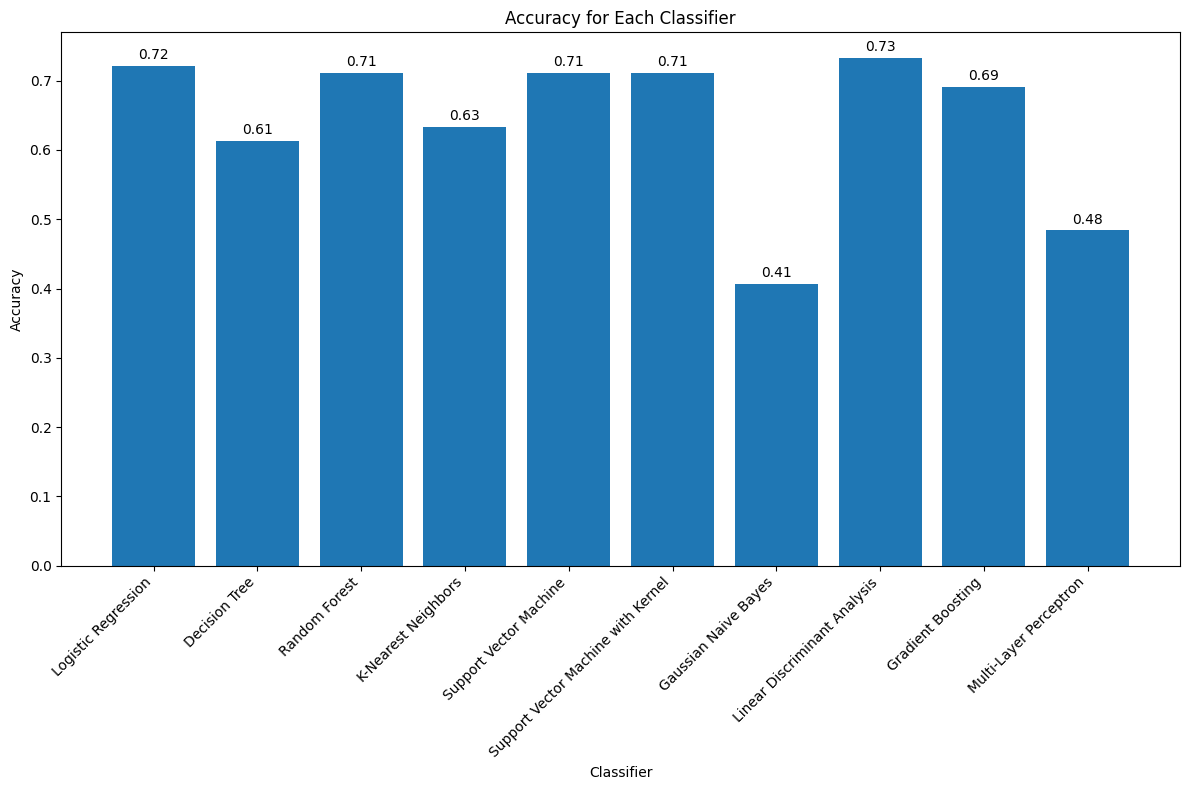

In [ ]:
results, results_new = train_and_eval(X_train, y_train, X_test, y_test)
print(results)
# plot_results(results_new)
plot_accuracy(results)
best_classifier_name = best_classifier()

#### Inference on Test data using the best model when all the features have been used:

In [ ]:
for classifier in classifiers:
    name = classifier['name']
    model = classifier['model']

    if name == best_classifier_name:
      predictions = model.predict_proba(X_inference)


Best Classifier:
Classifier: Linear Discriminant Analysis
Accuracy: 0.7331670822942643


In [ ]:
# Format and print the rounded probabilities
for prob in predictions:
  # print(prob)
  # break
  print("{:.15f}".format(prob[0]), "{:.15f}".format(prob[1]))

1.000000000000000 0.000000000000000
1.000000000000000 0.000000000000000
1.000000000000000 0.000000000000000
0.000000000000000 1.000000000000000
1.000000000000000 0.000000000000000
0.000000000000000 1.000000000000000
1.000000000000000 0.000000000000000
1.000000000000000 0.000000000000000
1.000000000000000 0.000000000000000
1.000000000000000 0.000000000000000
1.000000000000000 0.000000000000000
1.000000000000000 0.000000000000000
1.000000000000000 0.000000000000000
0.000000000000001 0.999999999999999
0.000000000000000 1.000000000000000
1.000000000000000 0.000000000000000
1.000000000000000 0.000000000000000
0.000000000000000 1.000000000000000
1.000000000000000 0.000000000000000
1.000000000000000 0.000000000000000
1.000000000000000 0.000000000000000
1.000000000000000 0.000000000000000
1.000000000000000 0.000000000000000
1.000000000000000 0.000000000000000
1.000000000000000 0.000000000000000
0.000000000000000 1.000000000000000
1.000000000000000 0.000000000000000
1.000000000000000 0.00000000

* It can be observed results are not up to the mark and hence we will proceed with feature selection techniques.

### After Feature Selection

First of all, we will try to see the correlation between the features using heatmap and will decide which columns we have to drop.

<ipython-input-206-75ce527bddb1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


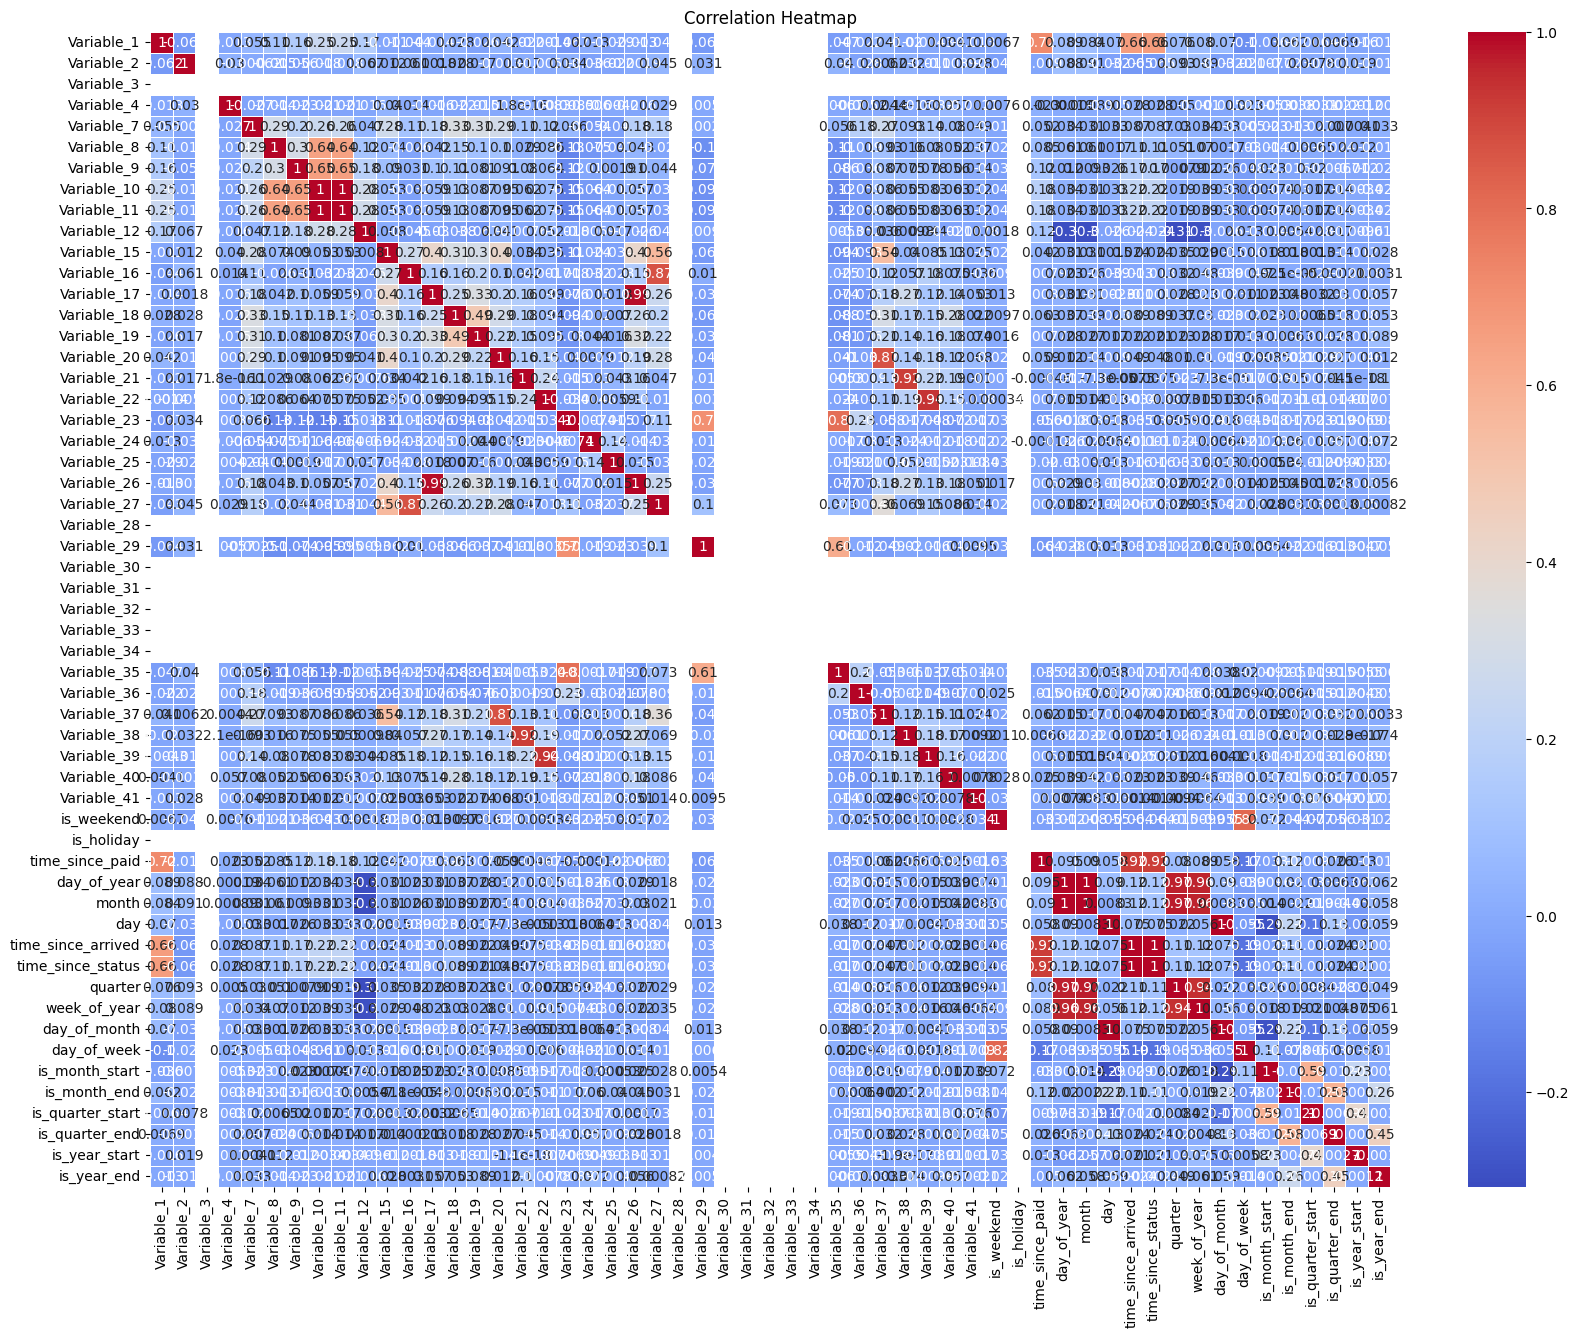

In [ ]:
# Compute the correlation matrix
correlation_matrix = train_df.corr()

# Generate the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

* From the above heatmap, it can be observed that there are many features which are not contributing even or hold any relationship.

* Upon more enquiry it was found that these features **though numeric** but are having only one unique value which suggests that irrespective of these values, Target can be anything and hence we can safely get rid of these for predictive modeling.

* Below are those columns:
  * Variable_3
  * Variable_28
  * Variable_30
  * Variable_31
  * Variable_32
  * Variable_33
  * Variable_34
  * is_holiday


In [ ]:
train_df_new = train_df.drop(['Variable_3', 'Variable_28', 'Variable_30', 'Variable_31', 'Variable_32', 'Variable_33', 'Variable_34', 'is_holiday'], axis=1)
train_df_new.shape

(2003, 53)

Let's plot it again:

<ipython-input-208-96eae85783f4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df_new.corr()


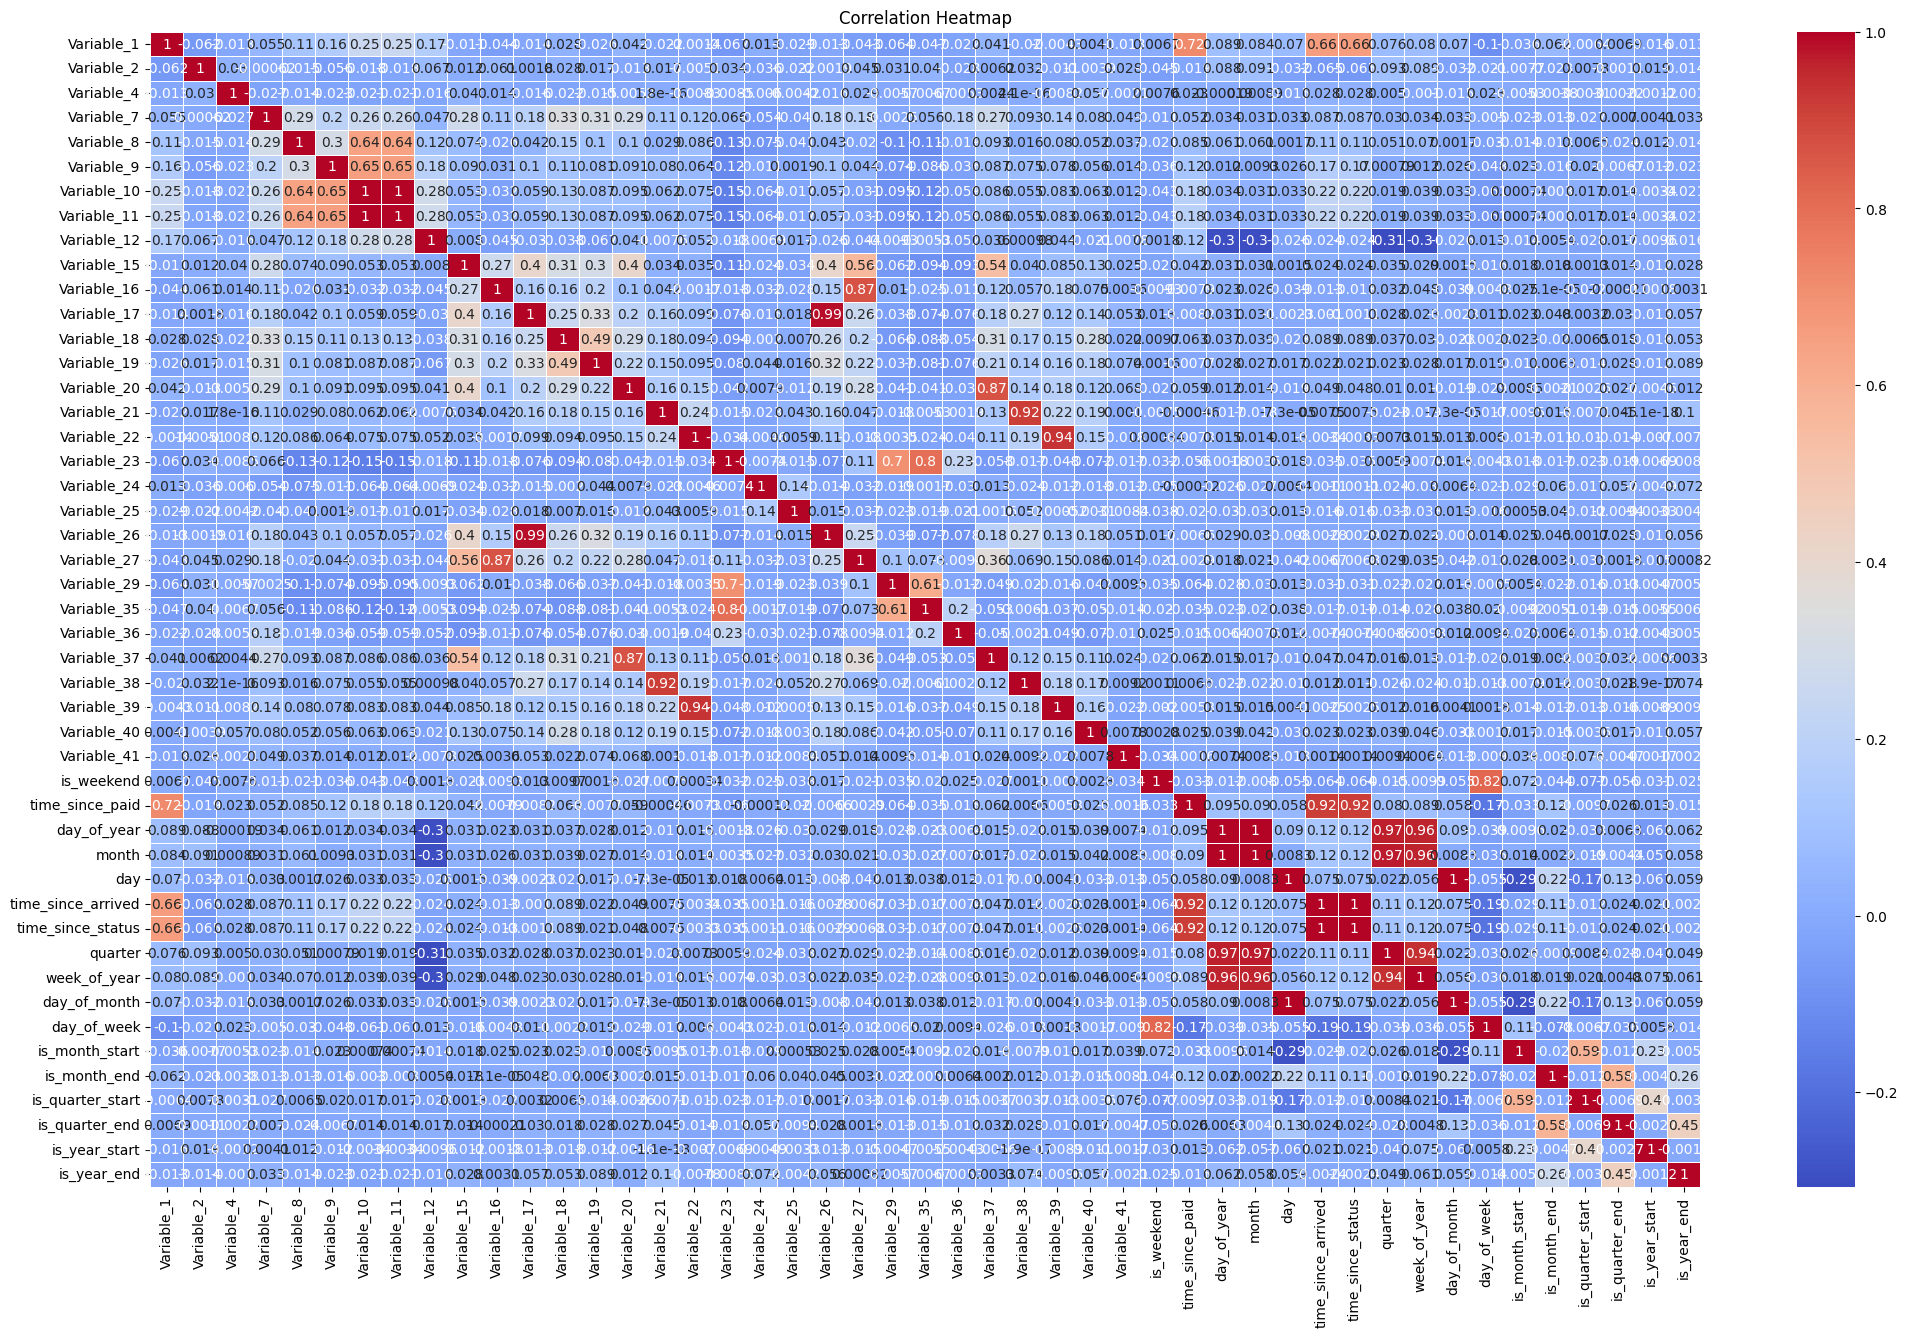

In [ ]:
# Compute the correlation matrix
correlation_matrix = train_df_new.corr()

# Generate the heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

* Now, based on the above heatmap, we can implement a logic where we discard the columns which are related to each other by 90% or more, as shown in the below code.

In [ ]:
# Calculate correlation matrix
corr_matrix = train_df_new.corr()

# Create a mask for highly correlated features
mask = corr_matrix >= 0.9

# Remove highly correlated columns
columns_to_drop = []
for col in corr_matrix.columns:
    if any(mask[col]):
        columns_to_drop.append(col)

df_filtered = train_df_new.drop(columns=columns_to_drop)
print('df_filtered shape: ',df_filtered.shape)
print('columns_to_drop: \n', columns_to_drop)

* As it can be seen, it suggests to drop most of the columns in the dataframe and only six are left including the Target column.

* Now, we will try another technique for feature selection, given by scikit-learn called as SelectKBest as shown below and then we will decide the final dataframe for modeling.

In [ ]:
# Define the number of features to select
k = 3

# Perform Min-Max scaling
scaler = MinMaxScaler()
# # scaled_data = scaler.fit_transform(data)

X_train_copy[numeric_columns] = scaler.fit_transform(X_train_copy[numeric_columns])
X_test_copy[numeric_columns] = scaler.transform(X_test_copy[numeric_columns])
X_inference[numeric_columns] = scaler.transform(X_inference[numeric_columns])

# Apply SelectKBest with chi-square
selector = SelectKBest(chi2, k=k)
X_train_kbest = selector.fit_transform(X_train_copy, y_train)
X_test_kbest = selector.transform(X_test_copy)
# X_inference_kbest = selector.transform(X_inference)

# Get the selected feature names
feature_names = train_df.columns[:-1]  # Exclude the target column
selected_feature_names = feature_names[selector.get_support()]

# # Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Create a DataFrame to display the selected features and their scores
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': selector.scores_})
scores_df = scores_df.sort_values(by='Score', ascending=False)

# # Get the column names of the selected features
selected_columns = X_train_copy.columns[selected_indices]
selected_columns = selected_columns[:2]

# # Create a new DataFrame with only the selected features
X_train_selected_data = X_train_copy[selected_columns]
X_test_selected_data = X_test_copy[selected_columns]

# Print the selected features and their scores
print("Selected Features:")
scores_df.head(k)

* We kept k as 3 and we see the score for first two features Vairable_13 and Variable_14 are quite high and hence will proceed with these two columns only for all the dataframes- **X_train, X_test and X_inference**.

In [ ]:
selected_columns

Index(['Variable_13', 'Variable_14'], dtype='object')

In [ ]:
df_filtered.head()

,Variable_6,Variable_13,Variable_14,Variable_45,season,Target
0,72,M,RATINGSTUFE M,F,Summer,1
1,25,M,RATINGSTUFE M,M,Summer,1
2,65,G,RATINGSTUFE G,F,Summer,0
3,65,D,RATINGSTUFE D,F,Summer,1
5,65,K,RATINGSTUFE K,M,Summer,1


In [ ]:
# train_df = df_filtered
df_filtered_new = df_filtered.drop(['Variable_6', 'Variable_45', 'season'], axis=1)
df_filtered_new

,Variable_13,Variable_14,Target
0,M,RATINGSTUFE M,1
1,M,RATINGSTUFE M,1
2,G,RATINGSTUFE G,0
3,D,RATINGSTUFE D,1
5,K,RATINGSTUFE K,1
...,...,...,...
2051,F,RATINGSTUFE F,0
2052,F,RATINGSTUFE F,1
2053,G,RATINGSTUFE G,1
2054,G,RATINGSTUFE G,1


Applying the same preprocessing methods on Inference data as on the training data.

In [ ]:
train_df = df_filtered_new

In [ ]:
# Split the data into features (X) and target variable (y) for train_df
X = train_df.drop('Target', axis=1)
y = train_df['Target']

# Split the data into features (X) and target variable (y) for test_df
X_inference = test_df.drop('Target', axis=1)
y_inference = test_df['Target']

# # Apply LabelEncoder to categorical columns
le = LabelEncoder()
for col in categorical_columns:
  if col in X.columns:
    X[col] = le.fit_transform(X[col])
    X_inference[col] = le.fit_transform(X_inference[col])

In [ ]:
X_inference.shape

(504, 60)

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Perform ordinal encoding on ordinal columns
ordinal_encoder = OrdinalEncoder()
X_train[ordinal_columns] = ordinal_encoder.fit_transform(X_train[ordinal_columns])
X_test[ordinal_columns] = ordinal_encoder.transform(X_test[ordinal_columns])
X_inference[ordinal_columns] = ordinal_encoder.transform(X_inference[ordinal_columns])

# Take copies for feature selection later on
# X_train_copy = X_train.copy()
# X_test_copy = X_test.copy()

# Scale the numerical features
scaler = StandardScaler()
for col in numeric_columns:
  if col in X_train.columns:
    X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
    X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])


In [ ]:
X_train.columns

Index(['Variable_13', 'Variable_14'], dtype='object')

In [ ]:
X_train_selected_data

,Variable_13,Variable_14
247,7.0,7.0
1710,7.0,7.0
709,11.0,11.0
430,4.0,4.0
1911,6.0,6.0
...,...,...
1158,6.0,6.0
1325,7.0,7.0
882,5.0,5.0
1495,6.0,6.0




---



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to '1') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to '1') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in lab

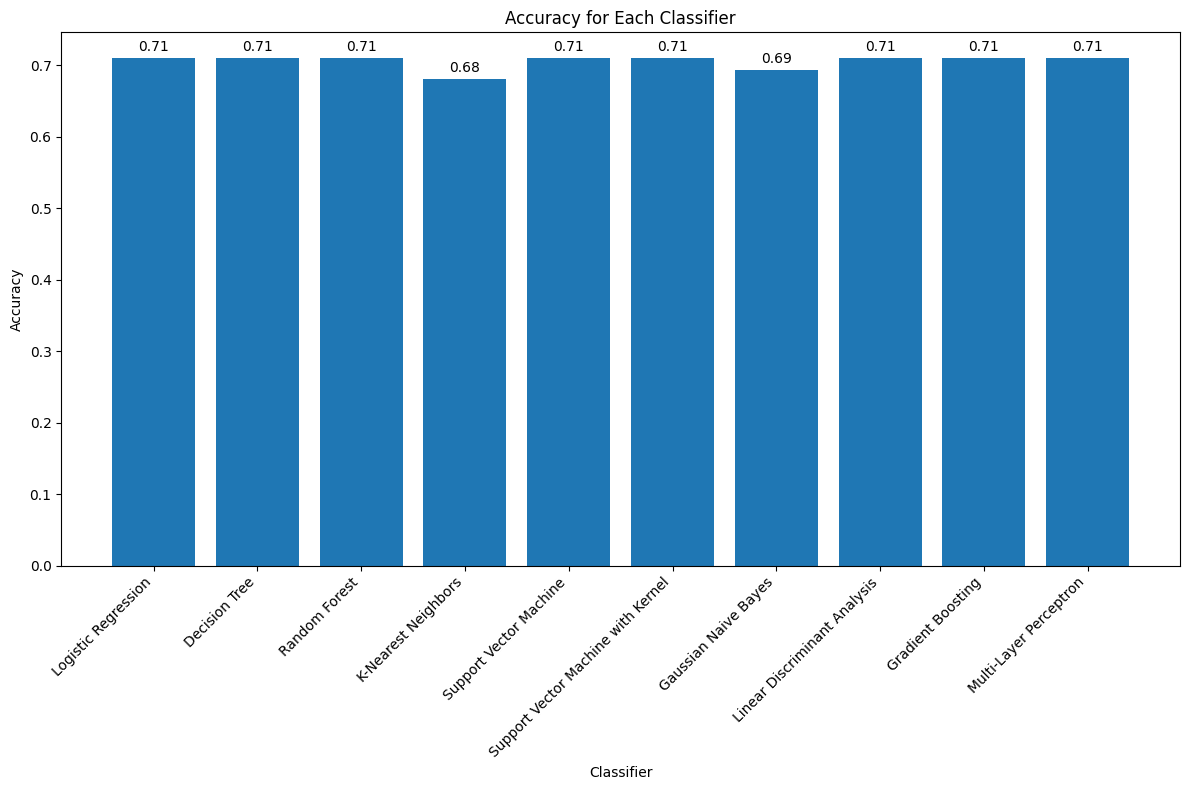

Best Classifier:
Classifier: Logistic Regression
Accuracy: 0.7107231920199502


In [ ]:
results, results_new = train_and_eval(X_train_selected_data, y_train, X_test_selected_data, y_test)
# plot_results(results_new)
plot_accuracy(results)
best_classifier_name = best_classifier()

**IMPORTANT OBSERVATIONS:**

* We are able to achieve almost the same accuracy with just two features rather than suing 65 features which we tried in previous section (using all the features).

* This shows that we can build a good trained model with just two of the important **ORDINAL** features. Rest are not contributing enough towards the  modeling.



---

